In [56]:
using Pkg
ENV["PYTHON"] = "/usr/bin/python3"
Pkg.build("PyCall")

   Building Conda ─→ `~/.julia/packages/Conda/3rPhK/deps/build.log`
   Building PyCall → `~/.julia/packages/PyCall/zqDXB/deps/build.log`


In [57]:
using LaTeXStrings

In [58]:
using PyCall

In [59]:
@pyimport vtuIO

In [60]:
thm_richards = vtuIO.PVDIO("/home/buchwalj/github/projects/temp/diff-thm-vsthmrichards/", "point_inj.pvd", dim=2)
thm_norichards = vtuIO.PVDIO("/home/buchwalj/github/projects/temp/diff-thm-vsthmrichards/", "point_inj-thm_1e0_pcs.pvd", dim=2)

PyObject <vtuIO.PVDIO object at 0x7f84d6c35640>

In [61]:
pts =Dict("pt0" =>(0.5,0.5,0.0))

Dict{String,Tuple{Float64,Float64,Float64}} with 1 entry:
  "pt0" => (0.5, 0.5, 0.0)

In [62]:
richards_thm = Dict()
normal_thm = Dict()

Dict{Any,Any} with 0 entries

In [63]:
richards_thm["temp"] = thm_richards.readTimeSeries("temperature", pts=pts)
normal_thm["temp"] = thm_norichards.readTimeSeries("temperature_interpolated", pts=pts)
richards_thm["press"] = thm_richards.readTimeSeries("pressure", pts=pts)
normal_thm["press"] = thm_norichards.readTimeSeries("pressure_interpolated", pts=pts)
richards_thm["displ"]=thm_richards.readTimeSeries("displacement", pts=pts)
normal_thm["displ"] = thm_norichards.readTimeSeries("displacement", pts=pts)

Dict{Any,Any} with 1 entry:
  "pt0" => [[0.0, 0.0], [2.5939e-5, 2.58522e-5], [4.71211e-5, 4.69887e-5], [6.2…

In [64]:
using Plots

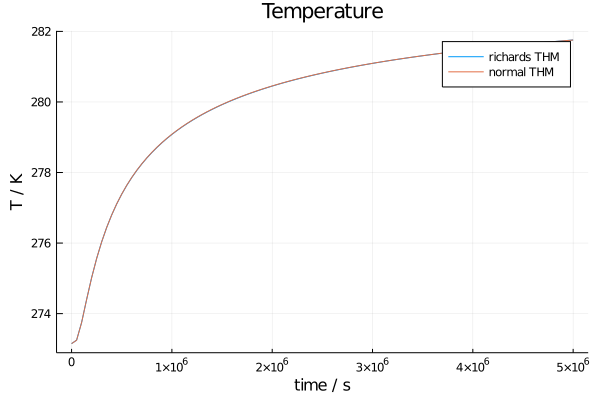

In [65]:
plot(thm_richards.ts_files["ts"], richards_thm["temp"]["pt0"], label="richards THM")
plot!(thm_norichards.ts_files["ts"], normal_thm["temp"]["pt0"], label="normal THM")
xlabel!("time / s")
ylabel!("T / K")
title!("Temperature")

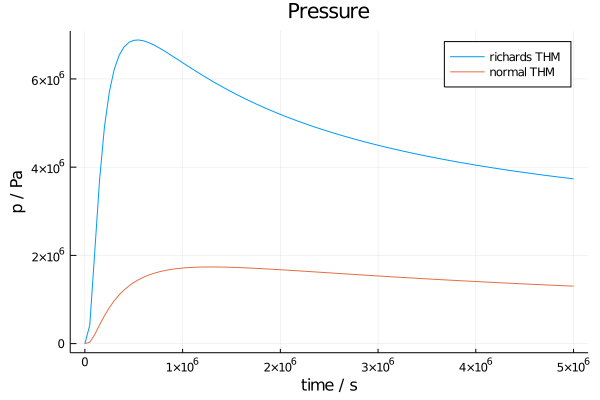

In [66]:
plot(thm_richards.ts_files["ts"], richards_thm["press"]["pt0"], label="richards THM")
plot!(thm_norichards.ts_files["ts"], normal_thm["press"]["pt0"], label="normal THM")
title!("Pressure")
xlabel!("time / s")
ylabel!("p / Pa")

In [67]:
displthm_x = [x[1] for x in  normal_thm["displ"]["pt0"]];
displthm_y = [x[2] for x in  normal_thm["displ"]["pt0"]];
displrichthm_x = [x[1] for x in richards_thm["displ"]["pt0"]];
displrichthm_y = [x[2] for x in richards_thm["displ"]["pt0"]];

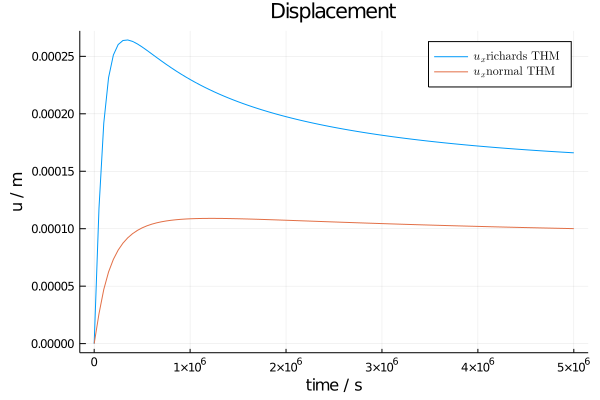

In [68]:
plot(thm_richards.ts_files["ts"], displrichthm_x, label=L"u_x \textrm{richards THM}")
plot!(thm_norichards.ts_files["ts"], displthm_x, label=L"u_x \textrm{normal THM}")
title!("Displacement")
xlabel!("time / s")
ylabel!("u / m")